In [62]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [63]:
# spectrum_startFreq, spectrum_endFreq = 80, 90   #in Mhz
# no_of_hops = 4
# dp_per_hop = 1024
# stepFreq = 0.002734     #in MHz

# total_spectral_length = spectrum_endFreq - spectrum_startFreq
# spectral_length_of_hop = total_spectral_length / no_of_hops
# dp_overlap_per_hop = (no_of_hops * dp_per_hop - total_spectral_length / stepFreq) / no_of_hops
# spectral_overlap_per_hop = dp_overlap_per_hop / dp_per_hop * spectral_length_of_hop

# hop_startFreq = spectrum_startFreq
# hop_endFreq = hop_startFreq + spectral_length_of_hop
# frequencies = []

In [64]:
# for i in range(no_of_hops - 1):
#     frequencies += list(np.linspace(hop_startFreq, hop_endFreq, dp_per_hop))
#     hop_startFreq = hop_endFreq - spectral_overlap_per_hop
#     hop_endFreq = hop_startFreq + spectral_length_of_hop
# frequencies += list(np.linspace(spectrum_endFreq - spectral_length_of_hop, spectrum_endFreq, dp_per_hop))

In [65]:
# spectral_overlap_per_hop

In [96]:
frequencies = np.linspace(1419,1421, 1024, endpoint=False)

In [97]:
frequencies[-10:], len(frequencies)

(array([1420.98046875, 1420.98242188, 1420.984375  , 1420.98632812,
        1420.98828125, 1420.99023438, 1420.9921875 , 1420.99414062,
        1420.99609375, 1420.99804688]),
 1024)

In [94]:
file_name = "bare_spectrum_1"
intensity_data = np.fromfile(f"{file_name}.bin", dtype=np.float32)
intensity_data = pd.DataFrame(intensity_data)

In [95]:
intensity_data

,0
0,-66.117027
1,-66.323936
2,-66.335342
3,-66.121483
4,-66.049316
...,...
1019,-66.139450
1020,-66.147331
1021,-66.194084
1022,-66.275368


In [99]:
intensity_data["power spectral density [dB/Hz]"] = intensity_data.iloc[:, 0]
del intensity_data[0]

In [100]:
intensity_data["frequency [MHz]"] = frequencies

In [101]:
intensity_data

,power spectral density [dB/Hz],frequency [MHz]
0,-66.117027,1419.000000
1,-66.323936,1419.001953
2,-66.335342,1419.003906
3,-66.121483,1419.005859
4,-66.049316,1419.007812
...,...,...
1019,-66.139450,1420.990234
1020,-66.147331,1420.992188
1021,-66.194084,1420.994141
1022,-66.275368,1420.996094


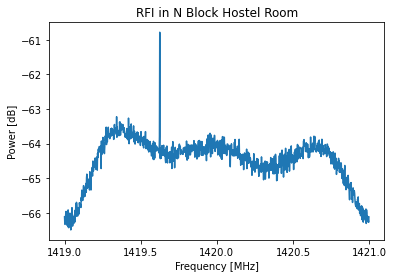

In [104]:
plt.plot(intensity_data.iloc[:, 1], intensity_data.iloc[:, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power [dB]")
plt.title("RFI in N Block Hostel Room")
plt.xticks([1419.0, 1419.5, 1420.0, 1420.5, 1421.0])
matplotlib.rc('xtick', labelsize=16)
plt.savefig(f"{file_name}.png", dpi=600)

In [17]:
# from_spectrum_dat_file = pd.read_csv("test_rtl_sdr_overlap_25k.dat", sep = " ", header = 4)
# from_spectrum_dat_file

,frequency [Hz],power spectral density [dB/Hz]
0,264860000.0,-59.5680
1,264860068.4,-59.2947
2,264860136.7,-59.6201
3,264860205.1,-59.4708
4,264860273.4,-59.3329
...,...,...
4091,265139658.2,-59.4513
4092,265139726.6,-59.3484
4093,265139794.9,-59.7476
4094,265139863.3,-59.7017


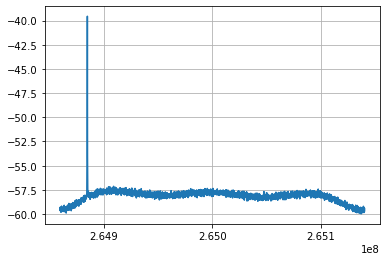

In [18]:
# plt.plot(from_spectrum_dat_file.iloc[:,0], from_spectrum_dat_file.iloc[:,1])
# matplotlib.rc('xtick', labelsize = 16)
# plt.grid()
# plt.savefig("from_spectrum_dat_file.png", dpi = 600)